# Dados globais de políticas de aborto

Fonte: \
Human Reproduction Programme \
https://abortion-policies.srhr.org/

## Coleta e limpeza de dados

In [1]:
import pandas as pd

In [2]:
df_backup = pd.read_csv('Abortion_Dataset.csv')
df_backup

,Region,Sub-region,Country,Date Completed,1. At the woman's request,1a. To save a woman’s life,1b. To preserve a woman’s health,1c. To preserve a woman’s physical health,1d. To preserve a woman’s mental health,1e. In cases of intellectual or cognitive disability of the woman,...,2g. Compulsory counselling,2h. Woman required to view ultrasound images and/or listen to foetal heartbeat,2i. Compulsory waiting period,2j. HIV test required,2k. Other STI test(s) required,2l. Police report required in case of rape,2m. Judicial authorization required in case of rape,2n. Prohibition of sex-selective abortion,2o. Other,8. Who can be criminally charged for an illegal abortion?
0,Africa,Northern Africa,Algeria,17 May 2022,No,Yes,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Woman, Provider, Person who helps a woman obta..."
1,Africa,Middle Africa,Angola,28 July 2022,No,Yes,No,Yes,Yes,No,...,NaN,NaN,Yes,NaN,NaN,Yes,NaN,NaN,NaN,"Woman, Provider, Person who helps a woman obta..."
2,Africa,Western Africa,Benin,07 December 2023,No,Yes,Yes,Yes,Yes,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,When the voluntary termination of pregnancy is...,"Provider, Person who helps a woman obtain abor..."
3,Africa,Southern Africa,Botswana,9 April 2020,NaN,Yes,NaN,Yes,Yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,"Woman, Provider, Person who helps a woman obta..."
4,Africa,Western Africa,Burkina Faso,06 October 2022,No,Yes,Yes,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Woman, Provider, Person who helps a woman obta..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,Oceania,Polynesia,Samoa,08 August 2022,No,Yes,No,Yes,Yes,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Woman, Provider, Person who helps a woman obta..."
277,Oceania,Melanesia,Solomon Islands,22 December 2022,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Woman, Provider, Person who helps a woman obta..."
278,Oceania,Polynesia,Tonga,22 April 2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,"Woman, Provider, Person who helps a woman obta..."
279,Oceania,Polynesia,Tuvalu,14 November 2018,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,"Woman, Provider, Person who helps a woman obta..."


In [3]:
df_backup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 31 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Region                                                                          281 non-null    object
 1   Sub-region                                                                      271 non-null    object
 2   Country                                                                         281 non-null    object
 3   Date Completed                                                                  281 non-null    object
 4   1. At the woman's request                                                       234 non-null    object
 5   1a. To save a woman’s life                                                      235 non-null    object
 6   1b. To preserve a woman’s 

In [4]:
df_aborto = df_backup.copy()

In [5]:
# Entendendo o formato da data para, então, padronizar
df_aborto['Date Completed'].unique()

array(['17 May 2022', '28 July 2022', '07 December 2023', '9 April 2020',
       '06 October 2022', '11 May 2022', '11 July 2022',
       '9 November 2018', '17 March 2024', '27 October 2022',
       '7 May 2017', '09 August 2022', '06 January 2023',
       '19 November 2018', '09 November 2021', '22 April 2020',
       '24 September 2024', '18 May 2022', '31 July 2019',
       '04 October 2022', '18 December 2023', '24 April 2024',
       '17 May 2018', '15 December 2023', '14 November 2022',
       '22 December 2022', '28 November 2022', '13 July 2022',
       '02 August 2022', '10 November 2021', '18 March 2024',
       '14 November 2018', '30 June 2022', '17 June 2021',
       '13 December 2022', '22 August 2022', '02 September 2022',
       '15 February 2019', '17 November 2022', '15 June 2021',
       '20 March 2023', '08 August 2022'], dtype=object)

In [6]:
df_aborto['Date Completed'] = pd.to_datetime(df_aborto['Date Completed'], format="%d %B %Y").dt.strftime('%Y-%m-%d')

In [7]:
df_aborto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 31 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Region                                                                          281 non-null    object
 1   Sub-region                                                                      271 non-null    object
 2   Country                                                                         281 non-null    object
 3   Date Completed                                                                  281 non-null    object
 4   1. At the woman's request                                                       234 non-null    object
 5   1a. To save a woman’s life                                                      235 non-null    object
 6   1b. To preserve a woman’s 

In [8]:
# Conferindo duplicatas no dataset
df_aborto.duplicated().sum()

np.int64(0)

Conferindo a quantidade de países, uma vez que a quantidade de linhas supera o número de países conhecidos (193, atualmente).

In [9]:
df_aborto['Country'].nunique()

281

Analizando diretamente o dataset identificou-se que algumas localidades foram expandidas a Estados e Cantões por terem legislação própria. Decidiu-se por manter assim.

In [10]:
# Conferindo dados duplicados na coluna 'Country'
df_aborto['Country'].duplicated().sum()

np.int64(0)

In [11]:
# Conferindo dados nulos na base
nulos = df_aborto.isnull().sum()
print(nulos)

Region                                                                              0
Sub-region                                                                         10
Country                                                                             0
Date Completed                                                                      0
1. At the woman's request                                                          47
1a. To save a woman’s life                                                         46
1b. To preserve a woman’s health                                                   74
1c. To preserve a woman’s physical health                                          73
1d. To preserve a woman’s mental health                                            75
1e. In cases of intellectual or cognitive disability of the woman                  90
1f. In cases of incest                                                             81
1g. In cases of rape                                  

In [12]:
# Como dados nulos serão interesantes para uma análise, trataremos estes como 'Not Specified'
df_aborto.fillna("Not Specified", inplace=True)

In [13]:
# Conferindo se o tratamento foi bem sucedido
nulos = df_aborto.isnull().sum()
print(nulos)

Region                                                                            0
Sub-region                                                                        0
Country                                                                           0
Date Completed                                                                    0
1. At the woman's request                                                         0
1a. To save a woman’s life                                                        0
1b. To preserve a woman’s health                                                  0
1c. To preserve a woman’s physical health                                         0
1d. To preserve a woman’s mental health                                           0
1e. In cases of intellectual or cognitive disability of the woman                 0
1f. In cases of incest                                                            0
1g. In cases of rape                                                        

In [14]:
# Conhecendo todas as colunas
df_aborto.columns

Index(['Region', 'Sub-region', 'Country', 'Date Completed',
       '1. At the woman's request', '1a. To save a woman’s life',
       '1b. To preserve a woman’s health',
       '1c. To preserve a woman’s physical health',
       '1d. To preserve a woman’s mental health',
       '1e. In cases of intellectual or cognitive disability of the woman',
       '1f. In cases of incest', '1g. In cases of rape',
       '1h. In cases of foetal impairment',
       '1i. For economic or social reasons', '1k. Other (please specify)',
       '2a. Gestational limit applies',
       '2b. Authorization of health-care professional(s) required',
       '2c. Parental consent required for minors',
       '2d. Judicial authorization required for minors',
       '2e. Husband’s consent required for married women',
       '2f. Authorized in specially licensed facilities only',
       '2g. Compulsory counselling',
       '2h. Woman required to view ultrasound images and/or listen to foetal heartbeat',
       '2i. C

In [15]:
df_aborto.describe(include='all')

,Region,Sub-region,Country,Date Completed,1. At the woman's request,1a. To save a woman’s life,1b. To preserve a woman’s health,1c. To preserve a woman’s physical health,1d. To preserve a woman’s mental health,1e. In cases of intellectual or cognitive disability of the woman,...,2g. Compulsory counselling,2h. Woman required to view ultrasound images and/or listen to foetal heartbeat,2i. Compulsory waiting period,2j. HIV test required,2k. Other STI test(s) required,2l. Police report required in case of rape,2m. Judicial authorization required in case of rape,2n. Prohibition of sex-selective abortion,2o. Other,8. Who can be criminally charged for an illegal abortion?
count,281,281,281,281,281,281,281,281,281,281,...,281,281,281,281,281,281,281,281,281,281
unique,6,20,281,42,4,4,4,4,4,4,...,4,3,4,4,4,4,4,3,25,7
top,Europe,Central America,Vanuatu,2017-05-07,No,Yes,No,No,No,No,...,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,"Woman, Provider, Person who helps a woman obta..."
freq,75,40,1,43,145,177,112,119,120,174,...,190,234,245,263,258,226,236,266,157,170


In [16]:
# Exportando a base tratada
df_aborto.to_csv('Abortion_Dataset_clean.csv', index=False)

## Analisando os dados

As quantidades exibidas serão sempre em relação ao número de localidades da ocorrência. \
Importante salientar que as localidades não se limitam a Países, uma vez que a base conta com informações específicas de Estados e Cantões que possuem legislação própria.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

### Visualizando a atualização da Base de Dados
Informação relevante para entender se a base se mantém atualizada ou não. \
OBS: em outubro de 2024 há a informação de atualização do sistema, com a possibilidade de ocasionar uma não acuracidade quanto sua atualização.

In [17]:
data_mais_recente = df_aborto['Date Completed'].max()
data_mais_antiga = df_aborto['Date Completed'].min()

print(f'Data mais recente: {data_mais_recente}')
print(f'Data mais antiga: {data_mais_antiga}')

Data mais recente: 2024-09-24
Data mais antiga: 2017-05-07


### Aborto permitido a partir de pedido da mulher
Casos em que a mulher pode solicitar aborto legal sem requisição de uma justificativa legal.

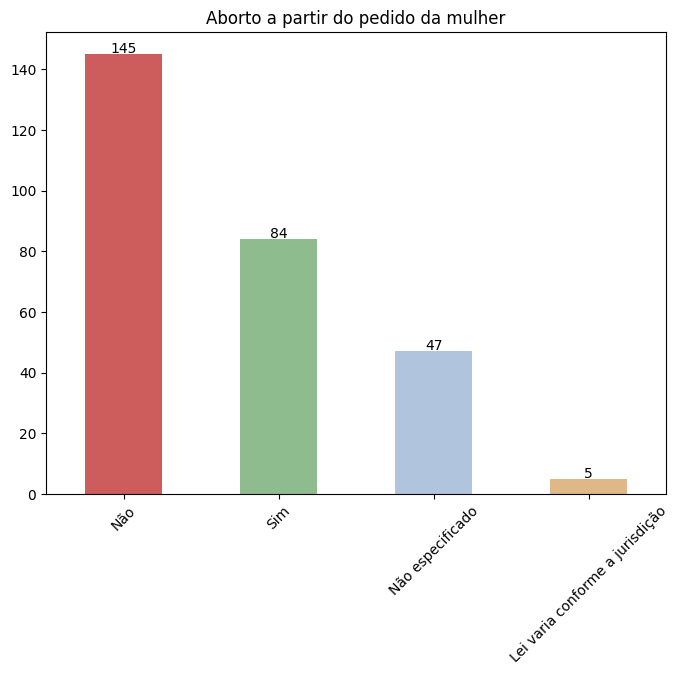

In [19]:
woman_request = df_aborto["1. At the woman's request"].value_counts()

traducao_woman_request = {
    'Yes': 'Sim',
    'No': 'Não',
    'Not Specified': 'Não especificado',
    'Law Varies By Jurisdiction': 'Lei varia conforme a jurisdição'
}
woman_request = woman_request.rename(traducao_woman_request)

plt.figure(figsize=(8, 6))
colors = ['indianred', 'darkseagreen', 'lightsteelblue', 'burlywood']
woman_request.plot(kind="bar", color=colors)
for index, value in enumerate(woman_request):
    plt.text(index, value + 0.5, int(value), ha='center')
plt.title('Aborto a partir do pedido da mulher')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()

O destaque aqui é perceber que há um número expressivo de localidades que não permitem de forma alguma o aborto a partir da decisão da mulher apenas, e poucos que acolhem essa decisão (na quantidade por países esse numero cai para 51, conforme o site da Human Reproduction Programme).

### Fundamentos legais pelos quais o aborto induzido é atualmente permitido
As leis e políticas de aborto são complexas. As leis e políticas de cada país podem ser protetoras ou punitivas, específicas ou não específicas, e limitantes ou facilitadoras para acesso e prestação de serviços. Leis e políticas podem ser encontradas em uma ampla gama de documentos de origem, incluindo códigos criminais/penais. \
Nesta análise procura-se identificar quantas localidades exige fundamentos legais para a realização de um aborto legalizado.

C:\Users\Lidi\AppData\Local\Temp\ipykernel_11000\1969046303.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yes_counts_1_df, x='Contagem', y='Fundamento', ax=ax1, palette=colors)


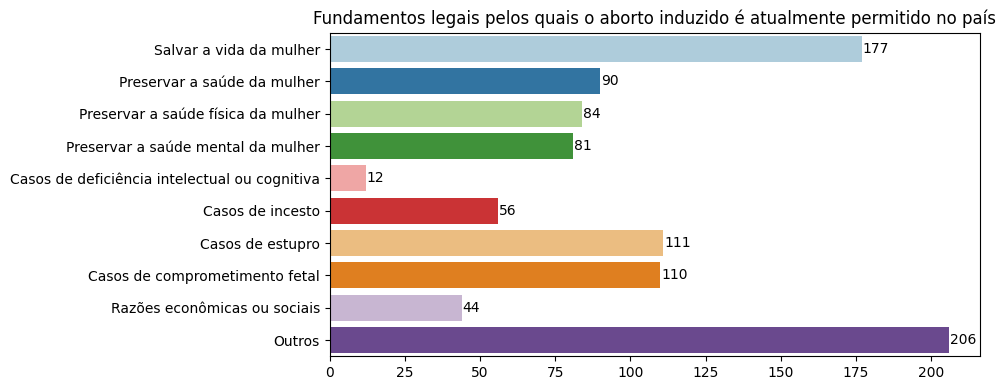

In [20]:
columns_sel_1 = ['1a. To save a woman’s life',
                  '1b. To preserve a woman’s health',
                  '1c. To preserve a woman’s physical health',
                  '1d. To preserve a woman’s mental health',
                  '1e. In cases of intellectual or cognitive disability of the woman',
                  '1f. In cases of incest',
                  '1g. In cases of rape',
                  '1h. In cases of foetal impairment',
                  '1i. For economic or social reasons']

yes_counts_1 = df_aborto[columns_sel_1].apply(lambda x: (x == "Yes").sum())

other_count_1 = df_aborto['1k. Other (please specify)'].notna() & (df_aborto['1k. Other (please specify)'] != "Not Specified")
yes_counts_1['1k. Other (please specify)'] = other_count_1.sum()

traducao_yes_counts_1 = {
    '1a. To save a woman’s life': "Salvar a vida da mulher",
    '1b. To preserve a woman’s health': "Preservar a saúde da mulher",
    '1c. To preserve a woman’s physical health': "Preservar a saúde física da mulher",
    '1d. To preserve a woman’s mental health': "Preservar a saúde mental da mulher",
    '1e. In cases of intellectual or cognitive disability of the woman': "Casos de deficiência intelectual ou cognitiva",
    '1f. In cases of incest': "Casos de incesto",
    '1g. In cases of rape': "Casos de estupro",
    '1h. In cases of foetal impairment': "Casos de comprometimento fetal",
    '1i. For economic or social reasons': "Razões econômicas ou sociais",
    '1k. Other (please specify)': "Outros"
}

yes_counts_1.index = yes_counts_1.index.map(traducao_yes_counts_1)

# Convertendo para uso com Seaborn
yes_counts_1_df = yes_counts_1.reset_index()
yes_counts_1_df.columns = ['Fundamento', 'Contagem']

fig, ax1 = plt.subplots(figsize=(10, 4))
colors = sns.color_palette("Paired", n_colors=len(yes_counts_1_df))
sns.barplot(data=yes_counts_1_df, x='Contagem', y='Fundamento', ax=ax1, palette=colors)

# Adicionar valores no gráfico
for index, value in enumerate(yes_counts_1_df['Contagem']):
    ax1.text(value + 0.2, index, int(value), va='center')

ax1.set_title('Fundamentos legais pelos quais o aborto induzido é atualmente permitido no país')
ax1.set_xlabel('')
ax1.set_ylabel('')
plt.tight_layout()
plt.show()

Uma curiosidade a aparição de "Razões econômicas ou sociais" dentre os fundamentos legais para a realização de um aborto legal.

### Restrições adicionais aplicáveis em caso de aborto induzido legal, em alguns ou todos os motivos
Além de uma justificativa legal, algumas localidades possuem outras exigências que precisam ser observadas para que o aborto legal seja realizado.

C:\Users\Lidi\AppData\Local\Temp\ipykernel_11000\1616340321.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yes_counts_2_df, x='Contagem', y='Fundamento', ax=ax1, palette=colors)


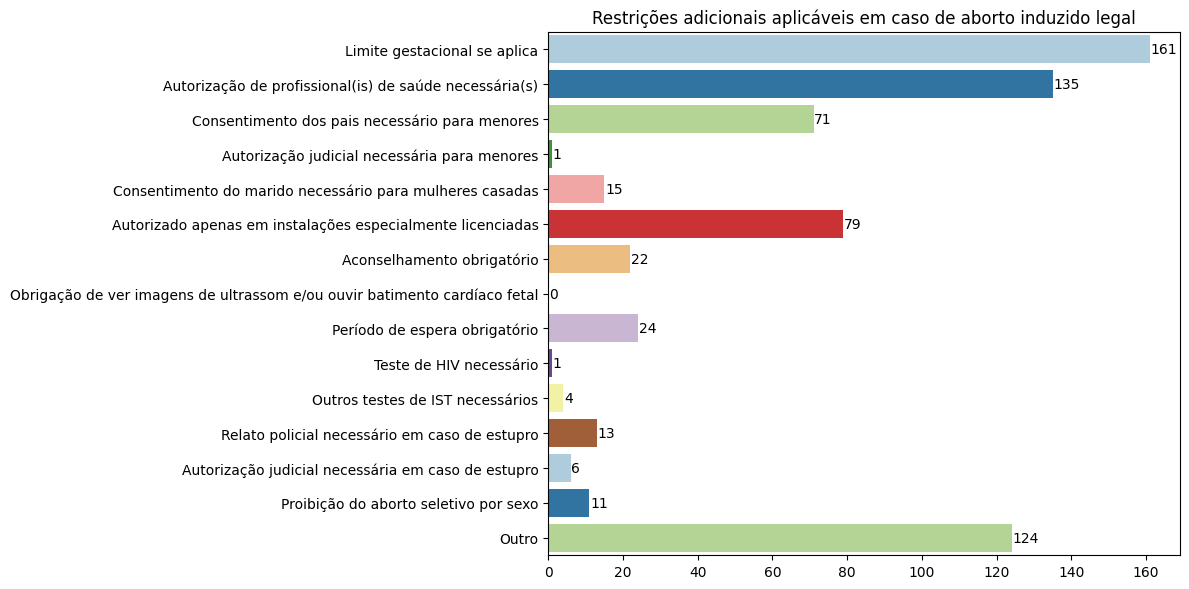

In [21]:
columns_sel_2 = ['2a. Gestational limit applies',
       '2b. Authorization of health-care professional(s) required',
       '2c. Parental consent required for minors',
       '2d. Judicial authorization required for minors',
       '2e. Husband’s consent required for married women',
       '2f. Authorized in specially licensed facilities only',
       '2g. Compulsory counselling',
       '2h. Woman required to view ultrasound images and/or listen to foetal heartbeat',
       '2i. Compulsory waiting period', '2j. HIV test required',
       '2k. Other STI test(s) required',
       '2l. Police report required in case of rape',
       '2m. Judicial authorization required in case of rape',
       '2n. Prohibition of sex-selective abortion', '2o. Other']

yes_counts_2 = df_aborto[columns_sel_2].apply(lambda x: (x == "Yes").sum())

other_count_2 = df_aborto['2o. Other'].notna() & (df_aborto['2o. Other'] != "Not Specified")
yes_counts_2['2o. Other'] = other_count_2.sum()

traducao_yes_counts_2 = {
    '2a. Gestational limit applies': 'Limite gestacional se aplica',
    '2b. Authorization of health-care professional(s) required': 'Autorização de profissional(is) de saúde necessária(s)',
    '2c. Parental consent required for minors': 'Consentimento dos pais necessário para menores',
    '2d. Judicial authorization required for minors': 'Autorização judicial necessária para menores',
    '2e. Husband’s consent required for married women': 'Consentimento do marido necessário para mulheres casadas',
    '2f. Authorized in specially licensed facilities only': 'Autorizado apenas em instalações especialmente licenciadas',
    '2g. Compulsory counselling': 'Aconselhamento obrigatório',
    '2h. Woman required to view ultrasound images and/or listen to foetal heartbeat': 'Obrigação de ver imagens de ultrassom e/ou ouvir batimento cardíaco fetal',
    '2i. Compulsory waiting period': 'Período de espera obrigatório',
    '2j. HIV test required': 'Teste de HIV necessário',
    '2k. Other STI test(s) required': 'Outros testes de IST necessários',
    '2l. Police report required in case of rape': 'Relato policial necessário em caso de estupro',
    '2m. Judicial authorization required in case of rape': 'Autorização judicial necessária em caso de estupro',
    '2n. Prohibition of sex-selective abortion': 'Proibição do aborto seletivo por sexo',
    '2o. Other': 'Outro'
}

yes_counts_2.index = yes_counts_2.index.map(traducao_yes_counts_2)

# Convertendo para uso com Seaborn
yes_counts_2_df = yes_counts_2.reset_index()
yes_counts_2_df.columns = ['Fundamento', 'Contagem']

fig, ax1 = plt.subplots(figsize=(12, 6))
colors = sns.color_palette("Paired", n_colors=len(yes_counts_2_df))
sns.barplot(data=yes_counts_2_df, x='Contagem', y='Fundamento', ax=ax1, palette=colors)
for index, value in enumerate(yes_counts_2_df['Contagem']):
    ax1.text(value + 0.2, index, int(value), va='center')
ax1.set_title('Restrições adicionais aplicáveis em caso de aborto induzido legal')
ax1.set_xlabel('')
ax1.set_ylabel('')
plt.tight_layout()
plt.show()

Uma análise pontual em relação a "Obrigação de ver imagens de ultrassom e/ou ouvir batimento cardíaco fetal" para entender a quantidade 0 (zero)

In [22]:
df_aborto['2h. Woman required to view ultrasound images and/or listen to foetal heartbeat'].unique()

array(['Not Specified', 'No', 'Restriction Varies By Jurisdiction'],
      dtype=object)

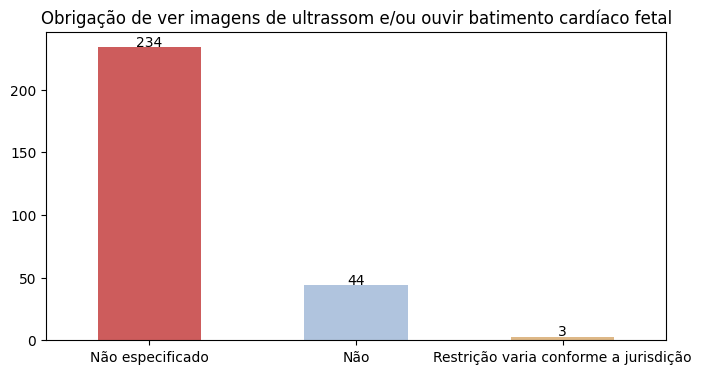

In [23]:
ultrasound = df_aborto['2h. Woman required to view ultrasound images and/or listen to foetal heartbeat'].value_counts()

traducao_ultrasound = {
    'No': 'Não',
    'Not Specified': 'Não especificado',
    'Restriction Varies By Jurisdiction': 'Restrição varia conforme a jurisdição'
}
ultrasound = ultrasound.rename(traducao_ultrasound)

plt.figure(figsize=(8, 4))
colors = ["indianred", "lightsteelblue", "burlywood"]
ultrasound.plot(kind="bar", color=colors)
for index, value in enumerate(ultrasound):
    plt.text(index, value + 0.5, int(value), ha='center')
plt.title('Obrigação de ver imagens de ultrassom e/ou ouvir batimento cardíaco fetal')
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()

Uma segunda visualização, agora em porcentagens.

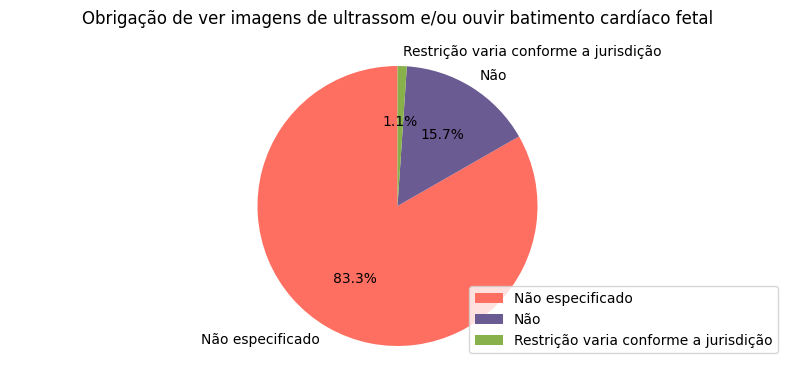

In [24]:
plt.figure(figsize=(10, 4))
colors = ['#FF6F61', '#6B5B93', '#88B04B']
plt.pie(ultrasound, labels=ultrasound.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Obrigação de ver imagens de ultrassom e/ou ouvir batimento cardíaco fetal', pad=20)
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()

É interessante observar que um número expressivo se enquadra em "Não especificado", possibilitando uma brecha quanto a essa exigência, que vem sendo criticada por organizações e grupos feministas por serem coercitivas e emocionalmente prejudiciais.

### Quem pode ser acusado criminalmente por aborto ilegal?
Pessoas que podem respoder criminalmente em casos de realização de um aborto ilegal. \
A mulher está incluída apenas nos casos em que a lei menciona explicitamente.

In [22]:
df_aborto['8. Who can be criminally charged for an illegal abortion?'].unique()

array(['Woman, Provider, Person who helps a woman obtain abortion',
       'Provider, Person who helps a woman obtain abortion',
       'Woman, Provider', 'Not Specified', 'Provider',
       'Woman, Person who helps a woman obtain abortion',
       'Person who helps a woman obtain abortion'], dtype=object)

C:\Users\Lidi\AppData\Local\Temp\ipykernel_11000\518839236.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=criminal_charge.values, y=criminal_charge.index, palette=colors, ax=ax1)


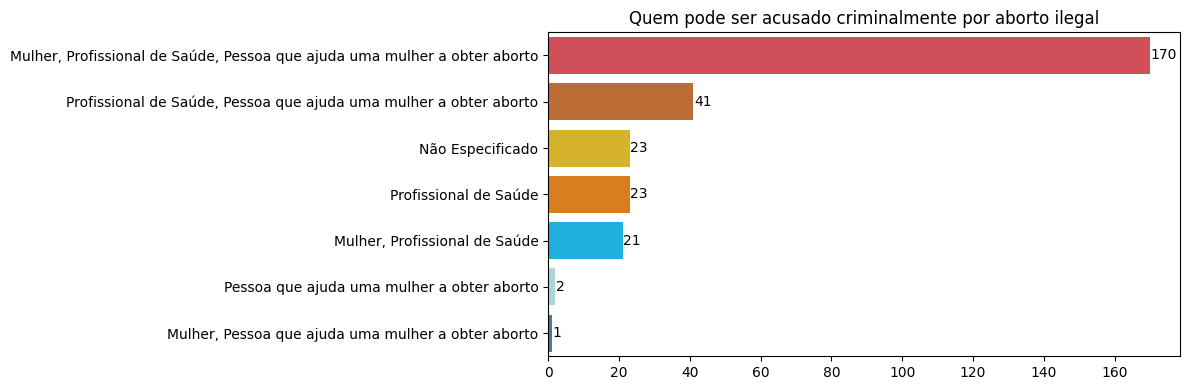

In [23]:
criminal_charge = df_aborto['8. Who can be criminally charged for an illegal abortion?'].value_counts()

traducao_criminal_charge = {
    'Woman, Provider, Person who helps a woman obtain abortion': 'Mulher, Profissional de Saúde, Pessoa que ajuda uma mulher a obter aborto',
    'Provider, Person who helps a woman obtain abortion': 'Profissional de Saúde, Pessoa que ajuda uma mulher a obter aborto',
    'Woman, Provider': 'Mulher, Profissional de Saúde',
    'Not Specified': 'Não Especificado',
    'Provider': 'Profissional de Saúde',
    'Woman, Person who helps a woman obtain abortion': 'Mulher, Pessoa que ajuda uma mulher a obter aborto',
    'Person who helps a woman obtain abortion': 'Pessoa que ajuda uma mulher a obter aborto'
}
criminal_charge = criminal_charge.rename(traducao_criminal_charge)

fig, ax1 = plt.subplots(figsize=(12, 4))
colors = ['#E63946', '#D2691E', '#F1C40F', '#F77F00', '#00BFFF', '#A8DADC', '#457B9D']
sns.barplot(x=criminal_charge.values, y=criminal_charge.index, palette=colors, ax=ax1)
for index, value in enumerate(criminal_charge):
    ax1.text(value + 0.2, index, int(value), va='center')
plt.title('Quem pode ser acusado criminalmente por aborto ilegal')
plt.ylabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Na maioria dos casos, quando se trata de aborto ilegal, quase todos os envolvidos podem ter que responder criminalmente. Talvez aqui fosse interessante compreender, caso haja, em situações em que o genitor force a mulher a fazer o aborto. Não fica claro se enquadraria em "Pessoa que ajda uma mulher a obter aborto".